# Case of Decision Tree

# 1. Import Library

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import plot_tree, export_graphviz
import graphviz

# 2. Import ASD Data

In [2]:
# Loading the dataset
ASD_data = pd.read_csv('./Toddler Autism dataset.csv')
# Replace special 
ASD_data.columns=ASD_data.columns.str.replace(' ','_')
ASD_data.columns=ASD_data.columns.str.replace('/','_')
ASD_data.columns=ASD_data.columns.str.replace('-','_')
# observing the shape of the data
print(ASD_data.shape)
print(pd.Categorical(ASD_data['Ethnicity']))
ASD_data

(1054, 19)
['middle eastern', 'White European', 'middle eastern', 'Hispanic', 'White European', ..., 'White European', 'black', 'middle eastern', 'White European', 'asian']
Length: 1054
Categories (11, object): ['Hispanic', 'Latino', 'Native Indian', 'Others', ..., 'black', 'middle eastern', 'mixed', 'south asian']


,Case_No,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Qchat_10_Score,Sex,Ethnicity,Jaundice,Family_mem_with_ASD,Who_completed_the_test,Class_ASD_Traits_
0,1,0,0,0,0,0,0,1,1,0,1,28,3,f,middle eastern,yes,no,family member,No
1,2,1,1,0,0,0,1,1,0,0,0,36,4,m,White European,yes,no,family member,Yes
2,3,1,0,0,0,0,0,1,1,0,1,36,4,m,middle eastern,yes,no,family member,Yes
3,4,1,1,1,1,1,1,1,1,1,1,24,10,m,Hispanic,no,no,family member,Yes
4,5,1,1,0,1,1,1,1,1,1,1,20,9,f,White European,no,yes,family member,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1049,1050,0,0,0,0,0,0,0,0,0,1,24,1,f,White European,no,yes,family member,No
1050,1051,0,0,1,1,1,0,1,0,1,0,12,5,m,black,yes,no,family member,Yes
1051,1052,1,0,1,1,1,1,1,1,1,1,18,9,m,middle eastern,yes,no,family member,Yes
1052,1053,1,0,0,0,0,0,0,1,0,1,19,3,m,White European,no,yes,family member,No


# 3. Data Preprocessing

## 3.1. Choose appropriate features 

In [3]:
Sex = pd.Categorical(ASD_data['Sex']).codes
Ethnicity = pd.Categorical(ASD_data['Ethnicity']).codes
Jaundice = pd.Categorical(ASD_data['Jaundice']).codes
Family_mem_with_ASD = pd.Categorical(ASD_data['Family_mem_with_ASD']).codes
Class_ASD_Traits_ = pd.Categorical(ASD_data['Class_ASD_Traits_']).codes

ASD_data['Sex'] = Sex
ASD_data['Ethnicity'] = Ethnicity
ASD_data['Jaundice'] = Jaundice
ASD_data['Family_mem_with_ASD'] = Family_mem_with_ASD
ASD_data['Class_ASD_Traits_'] = Class_ASD_Traits_

X = ASD_data.drop(['Case_No', 'Who_completed_the_test', 'Qchat_10_Score', 'Class_ASD_Traits_'], axis=1)

## 3.2 Choose target

In [4]:
Y_classification = ASD_data.Class_ASD_Traits_
Y_regression = ASD_data.Qchat_10_Score

# 4. Build Classification Tree

## 4.1 Split the dataset into training set and test set

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_classification, test_size=1 / 3, random_state=1,
                                                    stratify=Y_classification)
print(X_train.shape)
print(X_test.shape)

(702, 15)
(352, 15)


In [6]:
X_train.head()

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,Age_Mons,Sex,Ethnicity,Jaundice,Family_mem_with_ASD
723,1,1,0,0,0,1,1,1,0,1,23,1,5,1,1
492,1,0,0,1,1,0,1,0,1,1,28,1,5,1,0
990,1,0,1,1,1,1,1,0,1,1,35,0,8,0,0
836,1,1,1,1,1,1,1,1,1,1,29,1,5,0,0
317,0,1,0,1,0,1,1,1,1,1,16,1,8,1,1


## 4.2 Build classification tree

In [7]:
dt = DecisionTreeClassifier(criterion='gini',random_state=0)
dt.fit(X_train, y_train)

print("Accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
dt

Accuracy on training set: 1.000
Accuracy on test set: 0.923


DecisionTreeClassifier(random_state=0)

## 4.3. Use grid search to optimize the parameters

In [8]:
best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0

# grid serach
for max_depth in range(1, 10):
    for min_samples in range(2,100):
        dt = DecisionTreeClassifier(criterion='gini',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeClassifier(criterion='gini',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best accuracy on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best accuracy on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best decision tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))

Best accuracy on training set: 0.990
Best accuracy on test set: 0.923
Best decision tree with parameter max_depth of 8 and min_samples_split of 2


## 4.4 Decision tree visualization

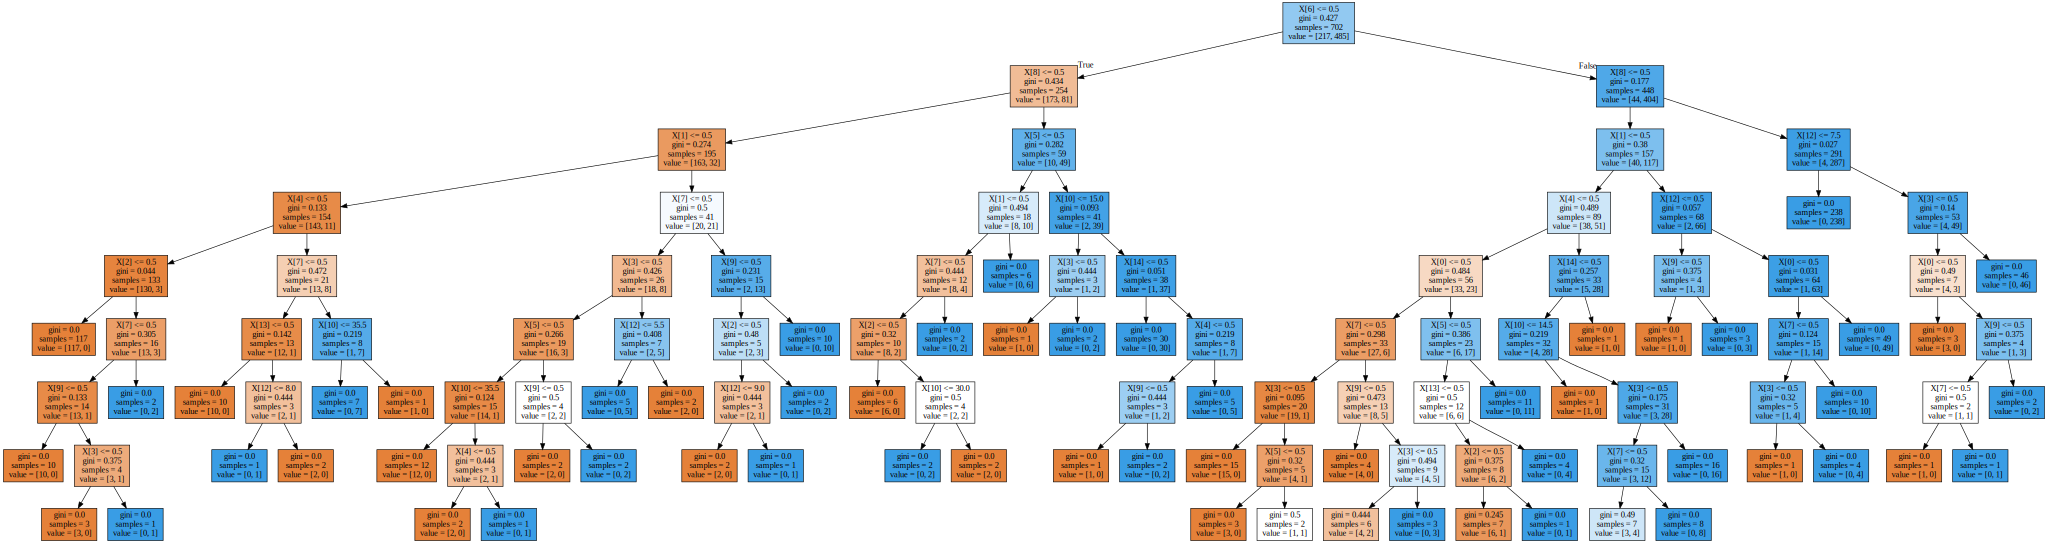

In [10]:
dot_data = export_graphviz(dt,filled=True)
graph = graphviz.Source(dot_data)
graph

# 5. Build Regression Tree

## 5.1 Split the dataset into training set and test set

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, Y_regression, test_size=1 / 3, random_state=42)
print(X_train.shape)
print(X_test.shape)

(702, 15)
(352, 15)


## 5.2 Build regreesion tree

In [23]:
dt = DecisionTreeRegressor(criterion='mse',random_state=0)
dt.fit(X_train, y_train)


print("Score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Score on test set: {:.3f}".format(dt.score(X_test, y_test)))

Score on training set: 1.000
Score on test set: 0.924


## 5.3. Use grid search to optimize the parameters

In [31]:
best_para = {'max_depth':0, 'min_samples':0}
best_test_acc = 0
# grid serach
for max_depth in range(1, 20):
    for min_samples in range(2,50):
        dt = DecisionTreeRegressor(criterion='mse',max_depth=max_depth, min_samples_split = min_samples, random_state=0)
        dt.fit(X_train, y_train)
        if dt.score(X_test, y_test) > best_test_acc:
            best_test_acc = dt.score(X_test, y_test)
            best_para['max_depth'] = max_depth
            best_para['min_samples'] = min_samples

dt = DecisionTreeRegressor(criterion='mse',max_depth=best_para['max_depth'], min_samples_split = best_para['min_samples'], random_state=0)
dt.fit(X_train, y_train)
print("Best score on training set: {:.3f}".format(dt.score(X_train, y_train)))
print("Best score on test set: {:.3f}".format(dt.score(X_test, y_test)))
print("Best regression tree with parameter max_depth of {0} and min_samples_split of {1}".format(best_para['max_depth'], best_para['min_samples']))

Best score on training set: 0.909
Best score on test set: 0.690
Best regression tree with parameter max_depth of 8 and min_samples_split of 6


## Decision tree visualize (save file)

In [32]:
plt.rcParams['figure.figsize'] = [24, 12] # Optionally adjust inline graph size
dot_data = export_graphviz(dt, out_file=None,
                      feature_names=X.columns,  
                      class_names=['Not ASD', 'ASD'], # "0": Not ASD ; "1": ASD
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
# graph
graph.render("tree_rules_image", view=True)
f = open("tree_rules.txt","w+")
f.write(dot_data)
f.close()
